# 1. Pseudocoloring


 Graylevel images are indexed images. So the value of the pixel is an index (an address) from a colormap. For graylevel images the colormap has gray levels from black (Red = Green = Blue = 0) to white (Red = Green = Blue = 1).
 
 Using the colormap concept, we can apply pseudocoloring (coloring the image with 'false' colors for enhancing certain aspects). In order to pseudocolor an image, the gray level colormap can be replaced with another colormap that contains colors.
 

Ex 1.1. Make an image and visualize it with different colormaps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# the image is
img = np.array([[0,1,2],[3,4,5],[6,7,8]])

# a colormap with colors
colormap = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0],[0,0,0],[0.5,0.5,0.5],[1,1,1],[1,0,1],[0,1,1],[0.5,1,0.25]])
colormap = mpl.colors.ListedColormap(colormap)

# display with gray colormap
# notice that the imshow function automatically scaled the colormap 
# so that the values from 0 to 8 to cover all the range of colors from black to white
plt.figure(), plt.imshow(img,cmap='gray')

# modify the colormap for pseudocoloring
plt.figure(), plt.imshow(img,cmap=colormap)

Modify the values from the image and from the colormap and see what happens. 
 
Note: the values from the colormap have to be in the range [0,1]. 

Ex 1.2. Read the image 'lena.png', convert it to graylevels and visualize it with different colormaps.

In [ ]:
# Import skimage and matplotlib
from skimage import io,color
import matplotlib.pyplot as plt

# read the image
img = io.imread('lena.png')
# Check the type of data in the image
print(img.dtype)
# Show the original image
plt.figure(),plt.imshow(img)

# convert to graylevels
img_gray = color.rgb2gray(img)
# check the type of data in the image after conversion
print(img_gray.dtype)
# Show the image with gray levels
plt.figure(),plt.imshow(img_gray,cmap='gray')
# Pseudocolor with different colormap
plt.figure(),plt.imshow(img_gray,cmap='jet')

What type of values does the img matrix have? What about the img_gray matrix?

In [ ]:
print(img.shape)

print(img[0,0])

print(img_gray.shape)

print(img_gray[0,0])

Ex 1.3. Read the image 'lena_gray.jpeg' and look at the shape and type of data in that image. What do you notice? Is the image stored with 3 color channels? Do you still need to convert it to graylevels?

In [ ]:
# Import skimage and matplotlib


# read the image

# Check the type of data and the shape of the image

# Show the original image



Ex 1.4. Create a 128 x 128 pixel image and its corresponding colormap with 128 colours which range from black to pure red (the column has the same colour from top to bottom).

<img src="ex4a.jpg">

In [ ]:
# Import matplotlib, pyplot (separate from matplotlib, since that is the way we will use it), and numpy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# How to create an array filled with zeros
img = np.zeros([128,128])
colormap = np.zeros([128,3])

# Create the image here


# Create the colormap here



# Display the image



Ex 1.5. Create a 256 x 256 pixel image and its corresponding colormap with 256 colours which range from black to pure red and then to yellow (red + green).<br>
<img src="ex4b1.jpg">

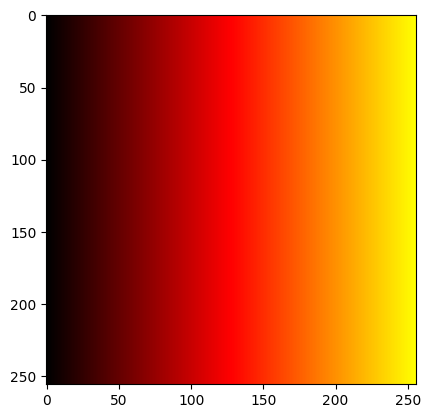

In [3]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create the empty array
img = np.zeros([256,256])
colormap = np.zeros([256,3])

# Create the image here
for i in range (256):
    img[:, i] = i


# Create the colormap here
for i in range (128):
    colormap[i, 0] = i/127;
    
for i in range (128, 256):
    colormap[i, 0] = 1
    colormap[i, 1] = (i - 128)/127

# Display the image
colormap = mpl.colors.ListedColormap(colormap)

plt.figure()
plt.imshow(img, cmap = colormap)
plt.show()

Ex 1.6. Read the 'lena_gray.jpeg'. Crop the lower-right corner of the image and show it in a different canvas.

Hint: Try to use sliceing, not a for loop 

In [ ]:
# Import skimage and matplotlib

# read the image

# show the image

# get the number of lines and columns from the image
h, w = img.shape
print(h)
print(w)

# crop the lower-right corner of the image

# show the lower-right corner of the image

## 2. Enhancement

Enhancing -> increasing the vizibility of the elements from the image.

Point operations = methods that map the input pixels into the output pixels with an one-to-one relationship. Thus for computing the new, enhanced value of the pixel, we apply a mathematical function to the old, initial pixel. The function takes into account only the initial value of the pixel. 

## Piecewise linear contrast stretching

The contrast is the difference in brightness (gray level intensity) between the pixels in a region of interest. The bigger the contrast, the better the vizibility of the elements from the images. Piecewise linear contrast stretching is defined as:
<br><br>

$$\large v=\begin{equation}
\left\{ 
  \begin{aligned}
    &\frac{T_{1}}{a}\,u,   \quad  u=[0,a) \\
    &T_{1}+\frac{T_{2}-T_{1}}{b-a}\,(u-a),   \quad  u=[a,b) \\
    &T_{2}+\frac{L-1-T_{2}}{L-1-b}\,(u-b),   \quad  u=[b,L) \\
  \end{aligned}
  \right.
\end{equation}
$$


</p><br>

The parameters that will affect the resulting image are <b>(a, b, T1, T2).</b> From the way this function is defined there are 3 segments of line (linear functions):  ( [0,0], [a,T1] ),  ( [a,T1], [b,T2] ),  ( [b,T2], [L-1,L-1] ). The graphical representation can be seen in figure 1. Depending on the parameters (a,b) and (T1,T2) the contrast can be increased or decreased on certain gray level ranges. If the slope of the graphic is below 1 the contrast is decreased. If the slope is above 1, the contrast is increased. 

<br><br><br>

<figure>
    <img src='imag_2.png' width=600><br>
    <center><b>Figure 1. </b>Piecewise linear contrast stretching</center>
</figure>
<br><br><br>



Ex 2.1. Implement the piecewise linear contrast stretching by using the mathematical function on every pixel in the image. 
Read the image 'lena_gray.jpeg' and apply the function on it with:
a) a=140, b=200, T1=70, T2=230 
b) a=20, b=220, T1=70, T2=160

Observe the resulting image. 

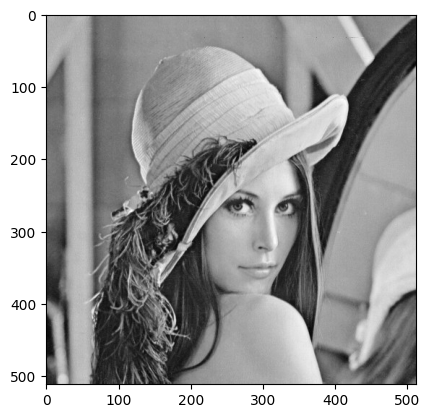

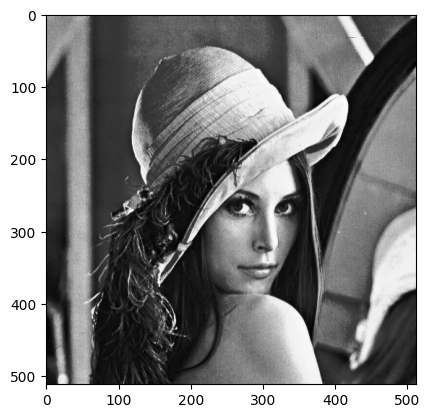

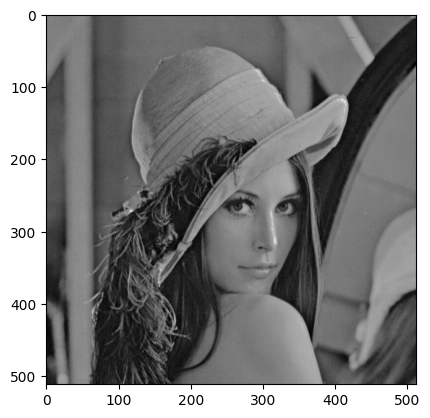

In [9]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# the function that applies the transform for a pixel in the image
def new_val_current_pixel(pixel_value, a, b, T1, T2, L):
    if pixel_value < a:
        return (T1/a) * pixel_value
    elif a <= pixel_value < b:
        return T1 + ((T2 - T1)/(b - a)) * (pixel_value - a)
    else:
        return T2 + ((L - 1 - T2)/(L - 1 - b)) * (pixel_value - b)

    ### the input parameters should be (a,b,T1,T2), current value of the pixel, total number of gray levels 
    ### the output should be the new value in the current pixel

# function that will apply the transform on all the image
def apply_linear_contrast(img, a, b, T1, T2, L):
    enhanced_img = np.zeros_like(img, dtype = np.float32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            enhanced_img[i,j] = new_val_current_pixel(img[i,j], a, b, T1, T2, L)
            
    return enhanced_img
    ### the input parameters should be (a,b,T1,T2), total number of gray levels, input image and image shape
    ### the output should be the enhanced image
    
# read the image
img = io.imread('lena_gray.jpeg')

# show the original image
plt.figure()
plt.imshow(img, cmap = 'gray')

# process the image
enhanced_img_a = apply_linear_contrast(img, 140, 200, 70, 230, 256)
enhanced_img_b = apply_linear_contrast(img, 20, 220, 70, 160, 256)

# show the resulting image
plt.figure()
plt.imshow(enhanced_img_a, cmap = 'gray')

plt.figure()
plt.imshow(enhanced_img_b, cmap = 'gray')

Bonus: can you write the method for piecewise linear contrast stretching in a more efficient way?